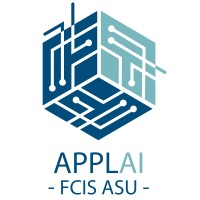

**World Population analysis**

# quick overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pycountry_convert
import pycountry_convert as pc
%matplotlib inline


In [ ]:
df=pd.read_csv('analysis.csv')

In [ ]:
df.head()

,Unnamed: 0,country name,2021 population,2020 population,area,density sq km,growth rate,population ratio,rank
0,0,China,1446364682,1439323776,9706961,149,0.34,18.34,1
1,1,India,1399367516,1380004385,3287590,424,0.97,17.69,2
2,2,United States,333777266,331002651,9372610,36,0.58,4.23,3
3,3,Indonesia,277625249,273523615,1904569,145,1.04,3.51,4
4,4,Pakistan,227103913,220892340,881912,255,1.95,2.86,5


In [ ]:
#droping the extra indexing column
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [ ]:
df.head()

,country name,2021 population,2020 population,area,density sq km,growth rate,population ratio,rank
0,China,1446364682,1439323776,9706961,149,0.34,18.34,1
1,India,1399367516,1380004385,3287590,424,0.97,17.69,2
2,United States,333777266,331002651,9372610,36,0.58,4.23,3
3,Indonesia,277625249,273523615,1904569,145,1.04,3.51,4
4,Pakistan,227103913,220892340,881912,255,1.95,2.86,5


In [ ]:
df.shape

(224, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country name      224 non-null    object 
 1   2021 population   224 non-null    int64  
 2   2020 population   224 non-null    int64  
 3   area              224 non-null    int64  
 4   density sq km     224 non-null    int64  
 5   growth rate       224 non-null    float64
 6   population ratio  224 non-null    float64
 7   rank              224 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 14.1+ KB


# Comparing between continents

In [ ]:
#Rewriting some of the country names to match its write name according to the global alpha2 code
df.at[133,'country name'] = "Bosnia and Herzegovina"
df.at[147,'country name'] = "Guinea-Bissau"
df.at[151,'country name']="Trinidad and Tobago"
df.at[152,'country name']="Timor-Leste"
df.at[158,'country name']="France"
df.at[181,'country name']="Sao Tome and Principe"
df.at[185,'country name']="Curaçao"
df.at[193,'country name']="Antigua and Barbuda"
df.at[202,'country name']="Saint Kitts and Nevis"
df.at[204,'country name']="Sint Maarten (Dutch part)"
df.at[207,'country name']="Turks and Caicos Islands"
df.at[217,'country name']="Saint Barthélemy"
df.at[218,'country name']="Saint Pierre and Miquelon"
df.at[223,'country name']="Holy See (Vatican City State)"

In [ ]:
#defining a function to swap selected rows in our dataset
def swap_rows(df, row1, row2):
    df.iloc[row1], df.iloc[row2] =  df.iloc[row2].copy(), df.iloc[row1].copy()
    return df

In [ ]:
#swaping some rows which are not found in the library to the end of the dataset
df= swap_rows(df, 152, 223)
df= swap_rows(df, 152, 222)
df= swap_rows(df, 166, 221)
df= swap_rows(df, 204, 220)
df= swap_rows(df, 215, 219)

In [ ]:
#getting the continent in which the country is and adding it to a new column in our dataset
df['continents'] = df.apply(lambda _: '', axis=1)
for i in range (0,218):
    x= df['country name'][i]
    country_code=pc.country_name_to_country_alpha2(x)
    country_continent_code = pc.country_alpha2_to_continent_code(country_code)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    df['continents'][i]=country_continent_name

C:\Users\DISCOVERY\AppData\Local\Temp\ipykernel_16376\2670974287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['continents'][i]=country_continent_name


In [ ]:
#getting the population size for each continent
sum_NA=sum(df[df['continents']=="North America"]['2021 population'])
sum_AF=sum(df[df['continents']=="Africa"]['2021 population'])
sum_As=sum(df[df['continents']=="Asia"]['2021 population'])
sum_AU=sum(df[df['continents']=="Oceania"]['2021 population'])
sum_SA=sum(df[df['continents']=="South America"]['2021 population'])
sum_EU=sum(df[df['continents']=="Europe"]['2021 population'])


<BarContainer object of 6 artists>

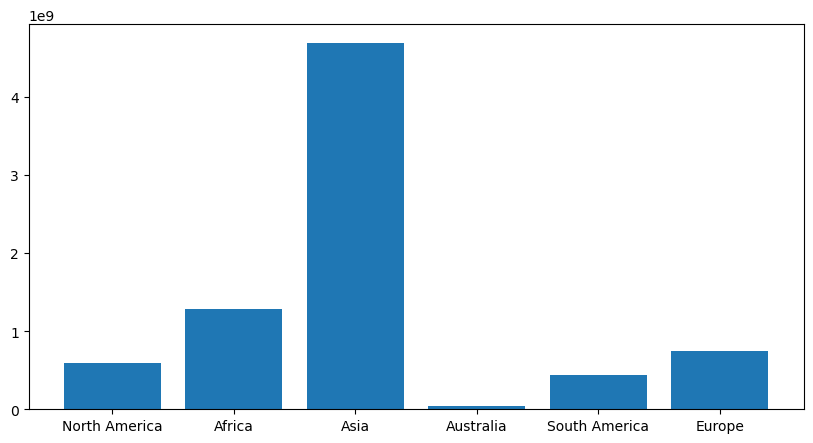

In [ ]:
#comparing the population size of each continent as a bar chart
population_sums = [sum_NA,sum_AF,sum_As,sum_AU,sum_SA,sum_EU]
continent_labels = ['North America', 'Africa', 'Asia', 'Australia', 'South America', 'Europe']
plt.figure(figsize=(10,5))
plt.bar(continent_labels,population_sums)

In [ ]:
#exporting the data set to complete ouanalysis on Power Bi
df.to_csv("powerbi.csv")

**conclusion**

As shown in the figure, Asia has the highest population size acoording to the population of the year 2021 while Australia has the lowest population size.

# relation between area of the country and  and it's population number

In [ ]:
#reindexing dataframe
new_order = ["country name","2020 population","2021 population","area","density sq km","growth rate","population ratio","rank"]
df = df.reindex(new_order, axis=1)
df.head(10)

,country name,2020 population,2021 population,area,density sq km,growth rate,population ratio,rank
0,China,1439323776,1446364682,9706961,149,0.34,18.34,1
1,India,1380004385,1399367516,3287590,424,0.97,17.69,2
2,United States,331002651,333777266,9372610,36,0.58,4.23,3
3,Indonesia,273523615,277625249,1904569,145,1.04,3.51,4
4,Pakistan,220892340,227103913,881912,255,1.95,2.86,5
5,Brazil,212559417,214626470,8515767,25,0.67,2.72,6
6,Nigeria,206139589,213743663,923768,229,2.55,2.68,7
7,Bangladesh,164689383,167015356,147570,1127,0.98,2.11,8
8,Russia,145934462,145902924,17098242,9,-0.02,1.85,9
9,Mexico,128932753,130853318,1964375,66,1.03,1.65,10


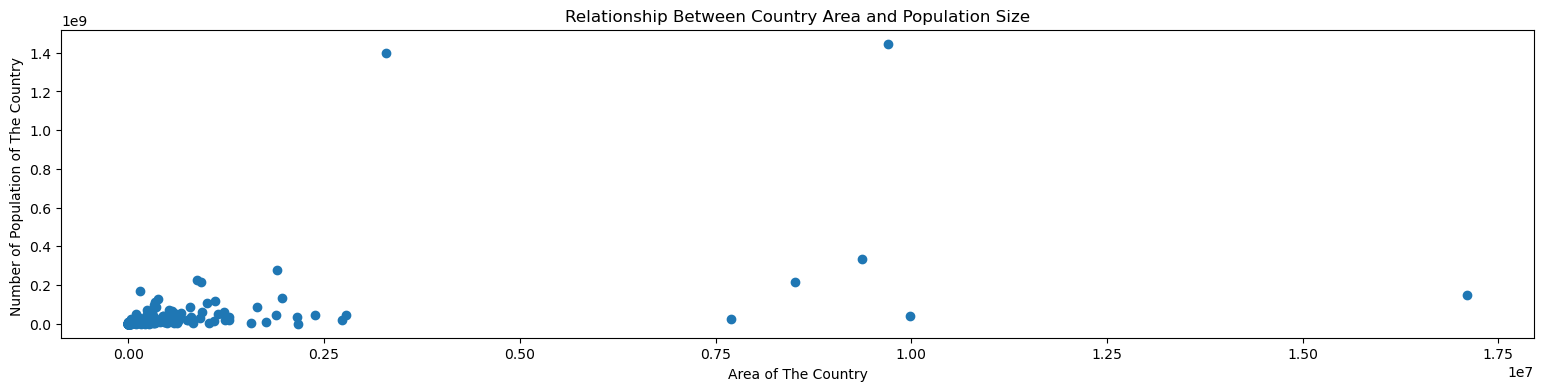

In [ ]:
plt.figure(figsize=(19,4))
x=df["area"]
y=df["2021 population"]
plt.scatter(x,y)
plt.title("Relationship Between Country Area and Population Size")
plt.xlabel( "Area of The Country")
plt.ylabel("Number of Population of The Country ")
plt.show()

Let's calculate the correlation between popoulation in 2021 and the area of it's country 

In [ ]:
print("Correlation coefficient between Area and Population:", df.loc[:, ["2021 population","area"]].corr().loc['area', '2021 population'].round(3))

Correlation coefficient between Area and Population: 0.453


**Conclusion**

As previously shown the majority of the countries have population size that corresponds to its size, however rare cases where small-scale countries have high population size and large-scale countries have low population size exists.

  In general, a correlation coefficient of around 0.7 or higher is considered a strong correlation, while a coefficient between 0.3 and 0.7 is considered a moderate correlation. As shown from the data, The correlation between Area and Population is 0.453, dictating a moderate correlation between Area and Population.

# difference between 2020 population and 2021 ?

In [ ]:
#ordering the dataframe in an ascending way
df.sort_values(by=['2021 population','2020 population'],ascending=False,inplace =True)

In [ ]:
df[["country name","2021 population","2020 population"]].head(5)

,country name,2021 population,2020 population
0,China,1446364682,1439323776
1,India,1399367516,1380004385
2,United States,333777266,331002651
3,Indonesia,277625249,273523615
4,Pakistan,227103913,220892340


**The Difference Between 2021 Population and 2020 Population For The Maximum 5 Countries Have Population**

<AxesSubplot:title={'center':'The Difference Between 2020 population and 2021 population'}, xlabel='Country Name', ylabel='Populations'>

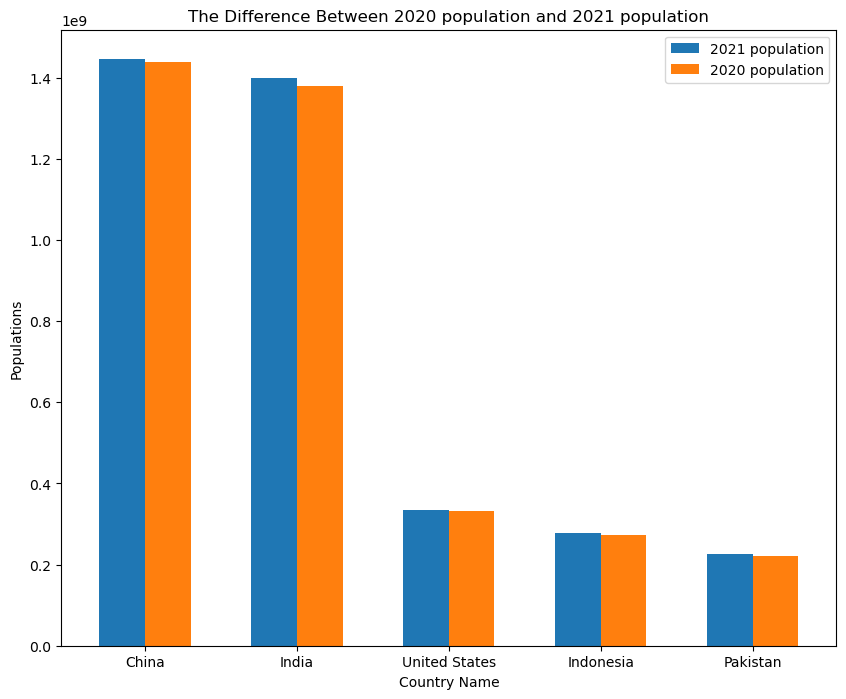

In [ ]:
df_max=df[["country name","2020 population","2021 population","growth rate"]].head(5)
df_max.plot(x="country name", y=["2021 population", "2020 population"], kind="bar",rot=0,figsize=(10,8),width=0.6,title="The Difference Between 2020 population and 2021 population",xlabel='Country Name',ylabel="Populations", layout='constrained')

In [ ]:
df[["country name","2021 population","2020 population"]].tail(5)

,country name,2021 population,2020 population
215,Montserrat,4977,4992
204,Falkland Islands,3533,3480
166,Niue,1619,1626
152,Tokelau,1373,1357
222,Holy See (Vatican City State),800,801


**The Difference Between 2021 Population and 2020 Population For The Minimum 5 Countries Have Population**

<AxesSubplot:title={'center':'The Difference Between 2020 population and 2021 population'}, xlabel='Country Name', ylabel='Populations'>

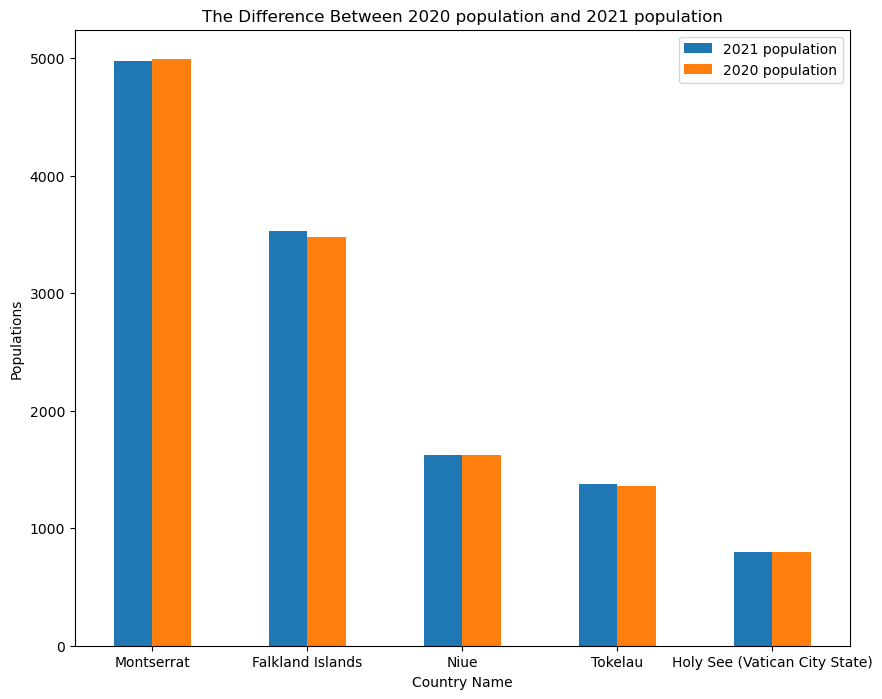

In [ ]:
df_min=df[["country name","2020 population","2021 population","growth rate"]].tail(5)
df_min.plot(x="country name", y=["2021 population", "2020 population"], kind="bar",rot=0,figsize=(10,8),title="The Difference Between 2020 population and 2021 population",xlabel='Country Name',ylabel="Populations",layout='constrained')

**Countries that have population in 2020 more than in 2021**

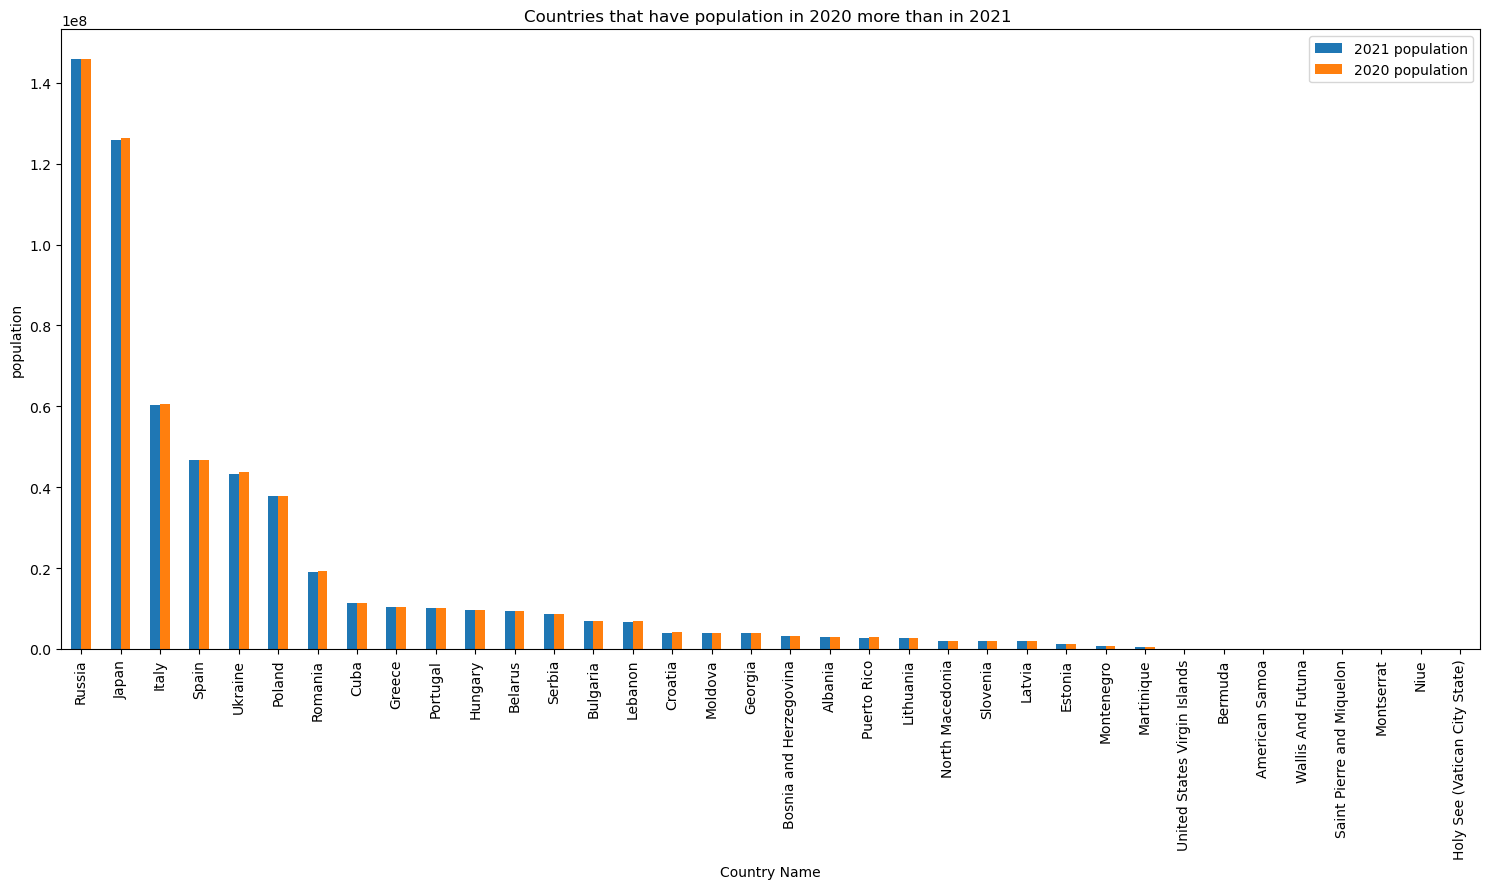

In [ ]:
df_diff=df[df["2021 population"]<df['2020 population']][['country name', '2021 population','2020 population','growth rate']]
df_diff.plot(x="country name", y=['2021 population','2020 population'], kind="bar",rot=90,figsize=(15,9),title="Countries that have population in 2020 more than in 2021 ",xlabel='Country Name',ylabel="population")
plt.tight_layout()
plt.show()

**Conclusion**

1. There Is No Big Difference Between 2021 Population and 2020 Population.

2. There are Some Countries Have Population in 2020 More than 2021 may be this because Some people   immigrated to other countries .

# growth rate

 What About The Growth Rate In Those Countires Which Have Population in 2020 More Than 2021 ?

In [ ]:
df_growth=df[df["2021 population"]<df['2020 population']][['country name', '2021 population','2020 population','growth rate']]

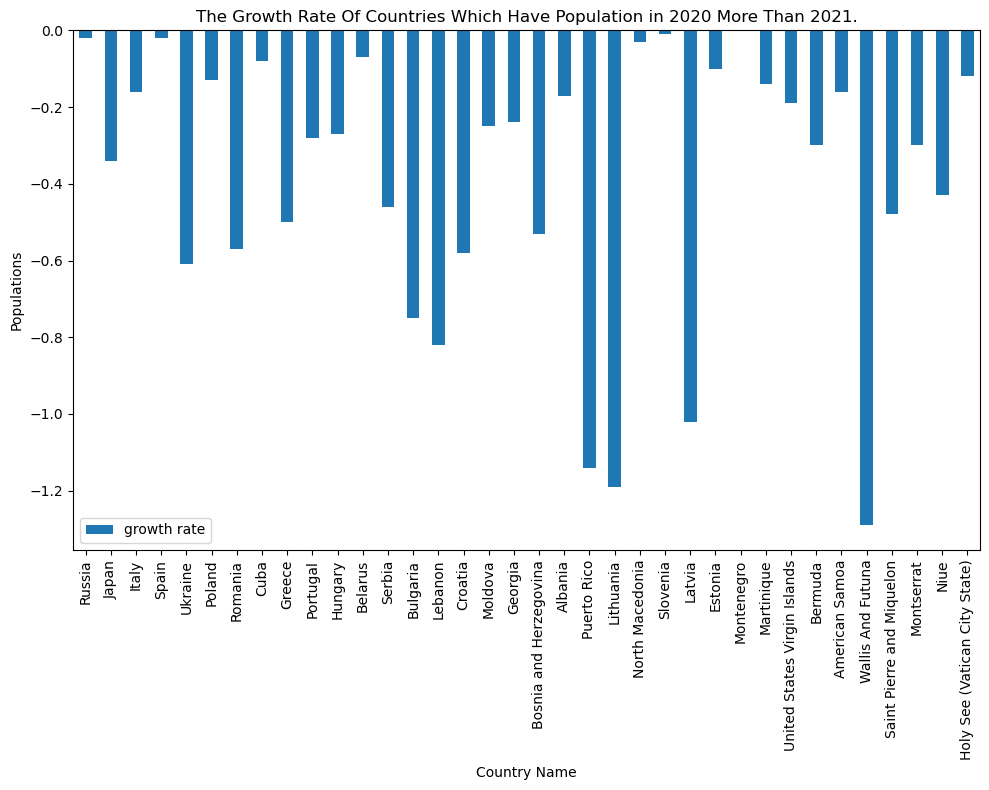

In [ ]:
df_growth.plot(x="country name", y='growth rate', kind="bar",rot=90,figsize=(10,8),title="The Growth Rate Of Countries Which Have Population in 2020 More Than 2021.",xlabel='Country Name',ylabel="Populations")
plt.tight_layout()
plt.show()

**Conclusion**

All The Countries Have Negative Growth Rate.</li>


But Is The Given Growth Rate Applied On The Difference Between 2020 and 2021 Populations?


**Calculate The Growth Rate With Formula**
<br>
<img width="600" height="151" src="https://www.learntocalculate.com/wp-content/uploads/2020/09/population-growth-1-1024x151.png" alt="Calculate Population Growth Rate." class="wp-image-3108" srcset="https://www.learntocalculate.com/wp-content/uploads/2020/09/population-growth-1-1024x151.png 1024w, https://www.learntocalculate.com/wp-content/uploads/2020/09/population-growth-1-300x44.png 300w, https://www.learntocalculate.com/wp-content/uploads/2020/09/population-growth-1-768x113.png 768w, https://www.learntocalculate.com/wp-content/uploads/2020/09/population-growth-1.png 1261w" sizes="(max-width: 1024px) 100vw, 1024px">

In [ ]:
df['New growth rate']=round(((df['2021 population']-df['2020 population'])/df['2020 population'])*100,2)

In [ ]:
df.head()

,country name,2020 population,2021 population,area,density sq km,growth rate,population ratio,rank,New growth rate
0,China,1439323776,1446364682,9706961,149,0.34,18.34,1,0.49
1,India,1380004385,1399367516,3287590,424,0.97,17.69,2,1.40
2,United States,331002651,333777266,9372610,36,0.58,4.23,3,0.84
3,Indonesia,273523615,277625249,1904569,145,1.04,3.51,4,1.50
4,Pakistan,220892340,227103913,881912,255,1.95,2.86,5,2.81


In [ ]:
df_newGrowth=df.head(10)

**the difference between growth rate and calculated growth rate**

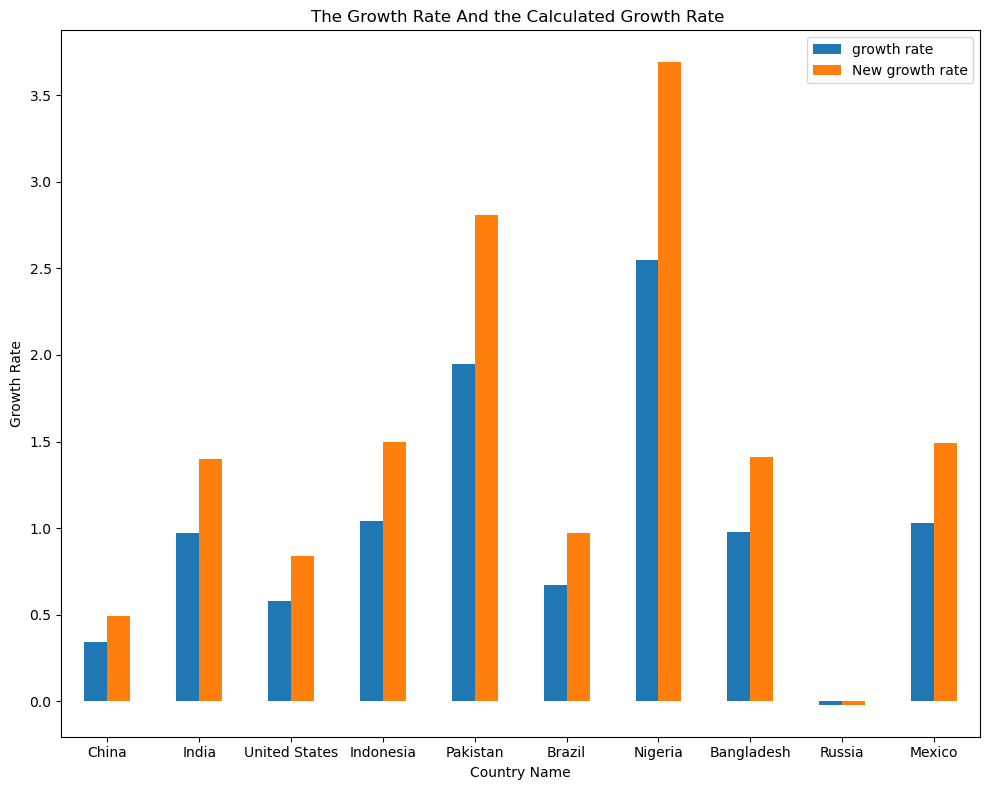

In [ ]:
df_newGrowth.plot(x="country name", y=['growth rate','New growth rate'], kind="bar",rot=0,figsize=(10,8),title="The Growth Rate And the Calculated Growth Rate ",xlabel='Country Name',ylabel="Growth Rate")
plt.tight_layout()
plt.show()


**The Growth rate and the calculated growth rate in countries that have population in 2020 more than 2021**

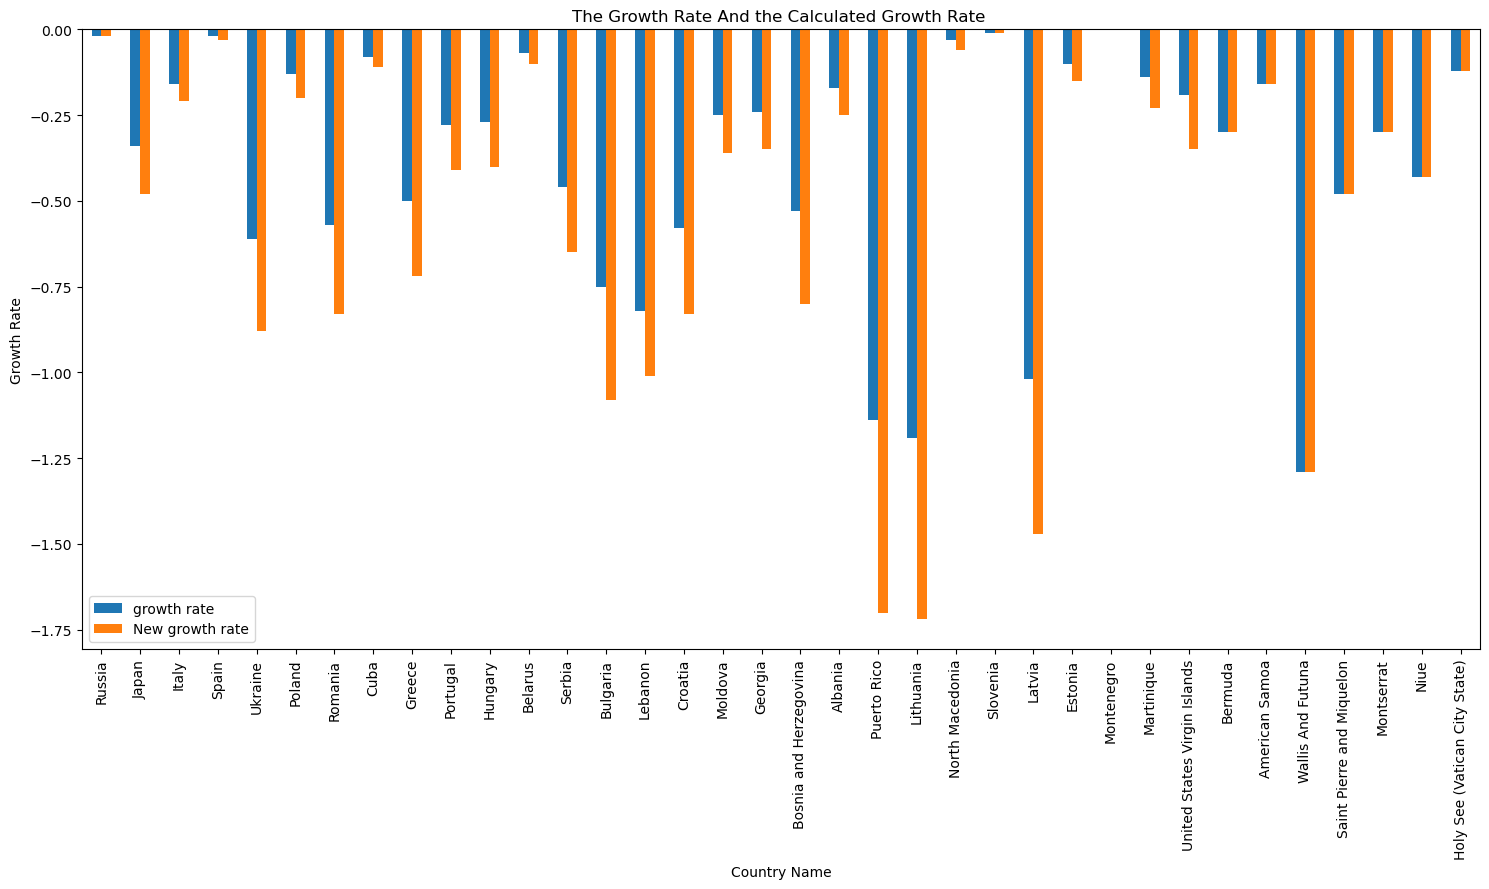

In [ ]:
df_growth=df[df["2021 population"]<df['2020 population']][['country name', '2021 population','2020 population','growth rate','New growth rate']]
df_growth.plot(x="country name", y=['growth rate','New growth rate'], kind="bar",rot=90,figsize=(15,9),title="The Growth Rate And the Calculated Growth Rate ",xlabel='Country Name',ylabel="Growth Rate")
plt.tight_layout()
plt.show()

**The Growth rate and the calculated growth rate in 10 countries that have population in 2021 more than 2020**

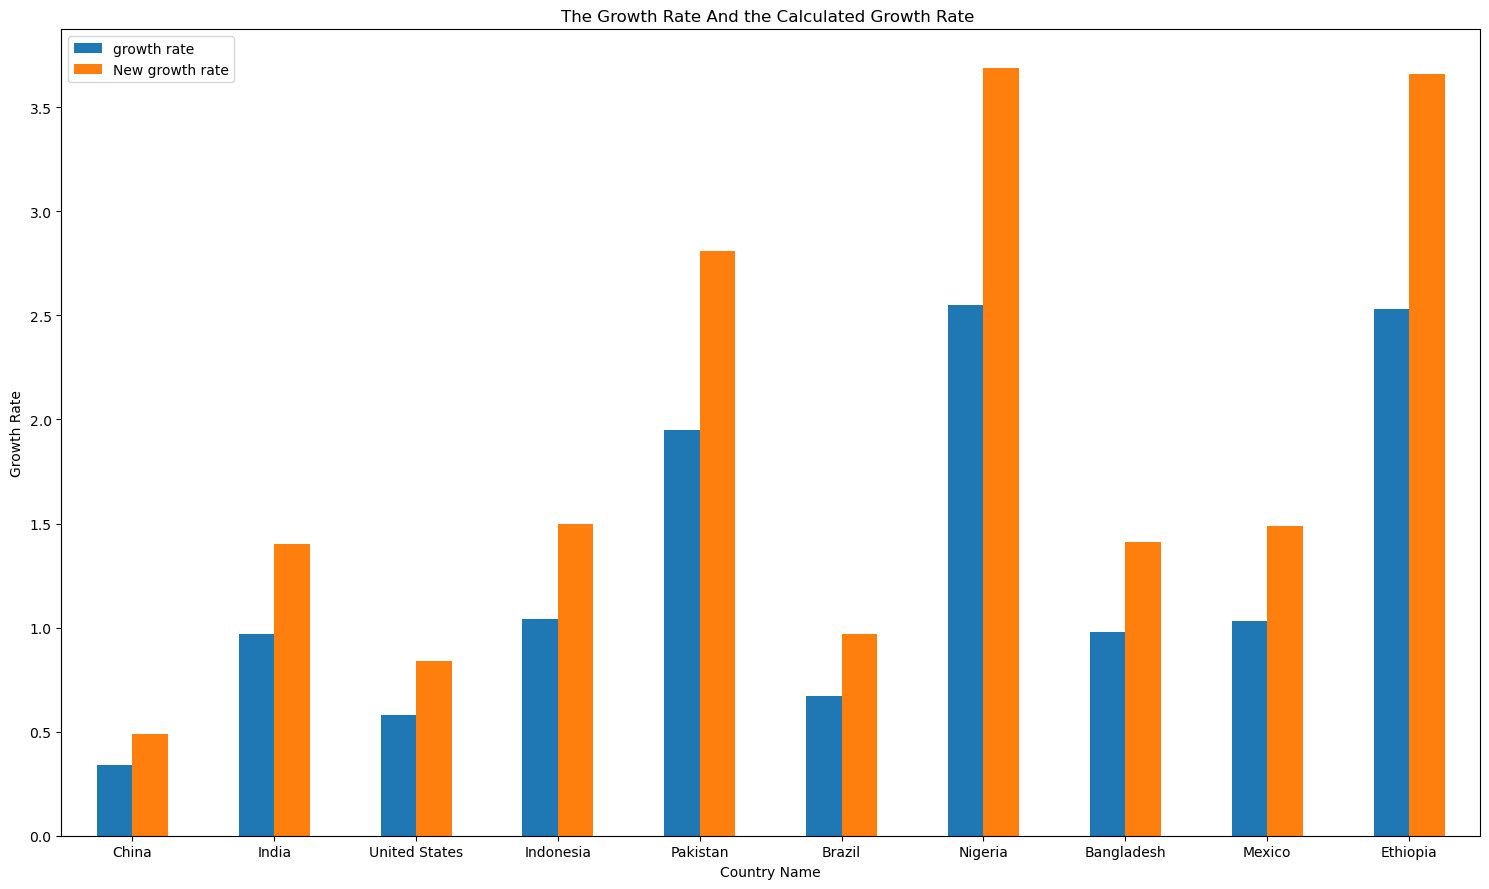

In [ ]:
df_growth=df[df["2021 population"]>df['2020 population']][['country name', '2021 population','2020 population','growth rate','New growth rate']].head(10)
df_growth.plot(x="country name", y=['growth rate','New growth rate'], kind="bar",rot=0,figsize=(15,9),title="The Growth Rate And the Calculated Growth Rate ",xlabel='Country Name',ylabel="Growth Rate")
plt.tight_layout()
plt.show()

**Conclusion**

-  Most of the given growth rate is not calculated right

- the countries that have population in 2021 more than 2020 have positive growth rate

- Still The countries that have in 2020 populations more than 2021 have Negative growth rate

# The most and least crowded countries

**sorting the data ascendingly respective to the population of 2021**

In [ ]:
#sorting the data according to the higher population size for the year 2021
df.sort_values(by=['2021 population'],ascending=False)

,country name,2020 population,2021 population,area,density sq km,growth rate,population ratio,rank,New growth rate
0,China,1439323776,1446364682,9706961,149,0.34,18.34,1,0.49
1,India,1380004385,1399367516,3287590,424,0.97,17.69,2,1.40
2,United States,331002651,333777266,9372610,36,0.58,4.23,3,0.84
3,Indonesia,273523615,277625249,1904569,145,1.04,3.51,4,1.50
4,Pakistan,220892340,227103913,881912,255,1.95,2.86,5,2.81
...,...,...,...,...,...,...,...,...,...
215,Montserrat,4992,4977,102,49,-0.30,0.00,228,-0.30
204,Falkland Islands,3480,3533,12173,0,1.52,0.00,229,1.52
166,Niue,1626,1619,260,6,-0.43,0.00,230,-0.43
152,Tokelau,1357,1373,12,114,1.18,0.00,231,1.18


In [ ]:
df.to_csv("ngr.csv")

**5 most crowded countries (2021)**

In [ ]:
df.iloc[:5,0:2]

,country name,2020 population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340


**5 least crowded countries (2021)**

In [ ]:
df.iloc[-5:,0:2]

,country name,2020 population
215,Montserrat,4992
204,Falkland Islands,3480
166,Niue,1626
152,Tokelau,1357
222,Holy See (Vatican City State),801


**sorting the data ascendingly respective to the population of 2020**

In [ ]:
#sorting the data according to the higher population size for the year 2020
df.sort_values(by=['2020 population'],ascending=False)

,country name,2020 population,2021 population,area,density sq km,growth rate,population ratio,rank,New growth rate
0,China,1439323776,1446364682,9706961,149,0.34,18.34,1,0.49
1,India,1380004385,1399367516,3287590,424,0.97,17.69,2,1.40
2,United States,331002651,333777266,9372610,36,0.58,4.23,3,0.84
3,Indonesia,273523615,277625249,1904569,145,1.04,3.51,4,1.50
4,Pakistan,220892340,227103913,881912,255,1.95,2.86,5,2.81
...,...,...,...,...,...,...,...,...,...
215,Montserrat,4992,4977,102,49,-0.30,0.00,228,-0.30
204,Falkland Islands,3480,3533,12173,0,1.52,0.00,229,1.52
166,Niue,1626,1619,260,6,-0.43,0.00,230,-0.43
152,Tokelau,1357,1373,12,114,1.18,0.00,231,1.18


**5 most crowded countries (2020)**

In [ ]:
df[['country name', '2020 population']][:5]


,country name,2020 population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340


**5 least crowded countries (2020)**

In [ ]:
df[['country name', '2020 population']][-5:]

,country name,2020 population
215,Montserrat,4992
204,Falkland Islands,3480
166,Niue,1626
152,Tokelau,1357
222,Holy See (Vatican City State),801


**visual display for the 5 most and least crowded countries**

**for 2021 population**

Text(0, 0.5, 'population size')

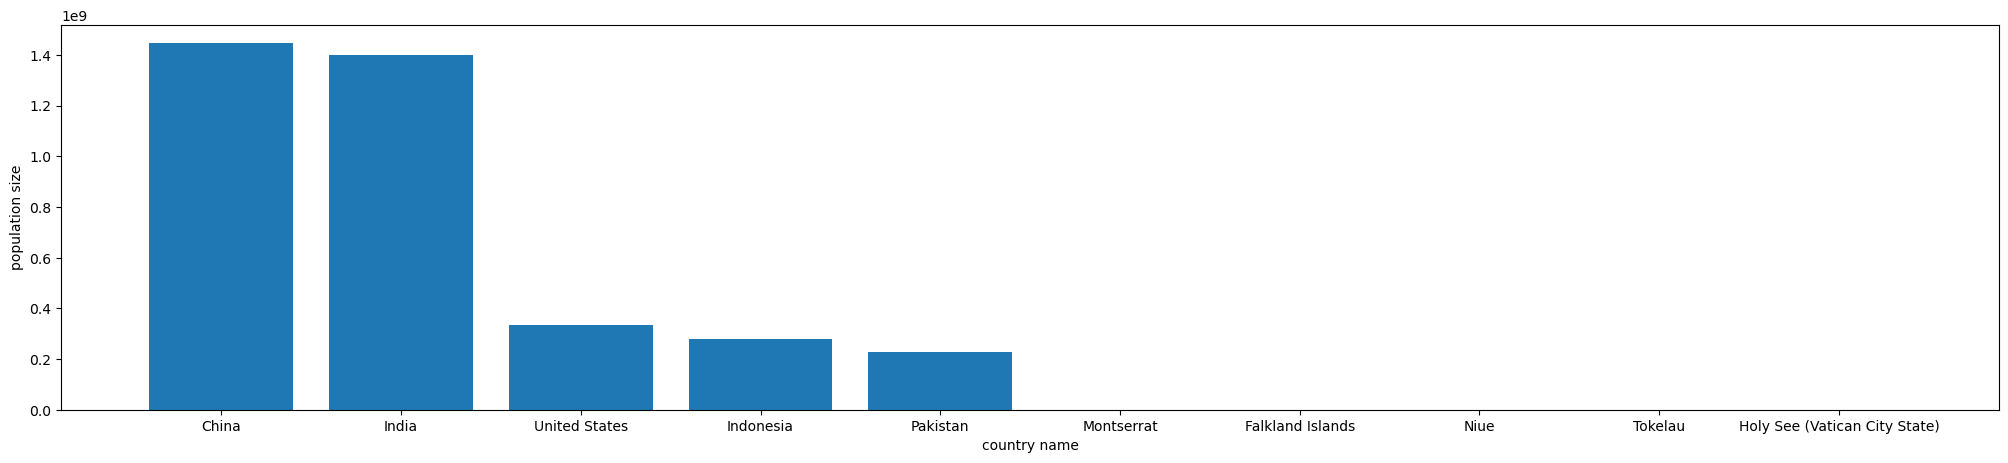

In [ ]:
x=df.iloc[[*range(5), *range(-5,0)]]['country name']
y=df.iloc[[*range(5), *range(-5,0)]]['2021 population']
plt.figure(figsize=(25, 5))
plt.bar(x,y)
plt.xlabel('country name')
plt.ylabel('population size')


Text(0, 0.5, 'population size in billions')

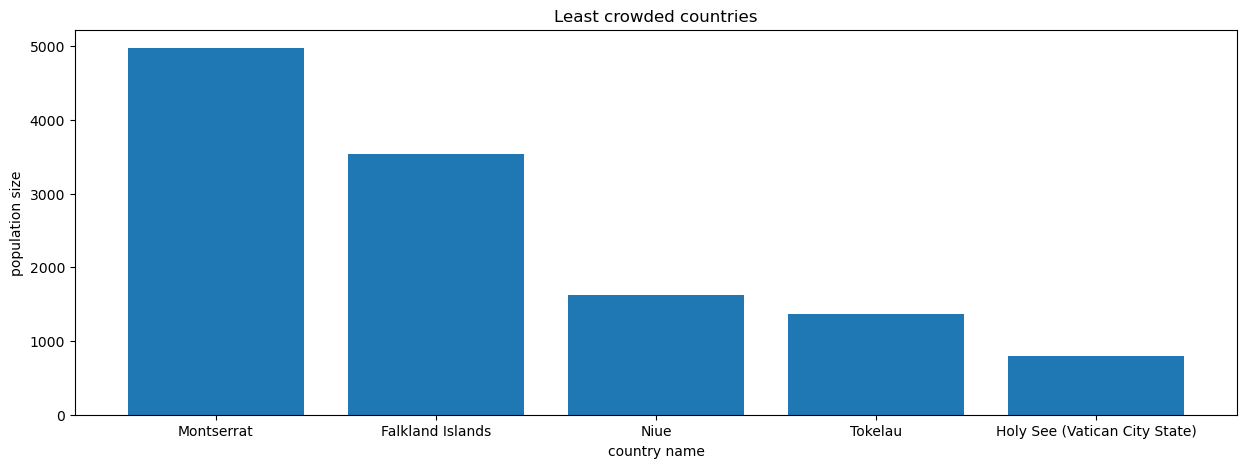

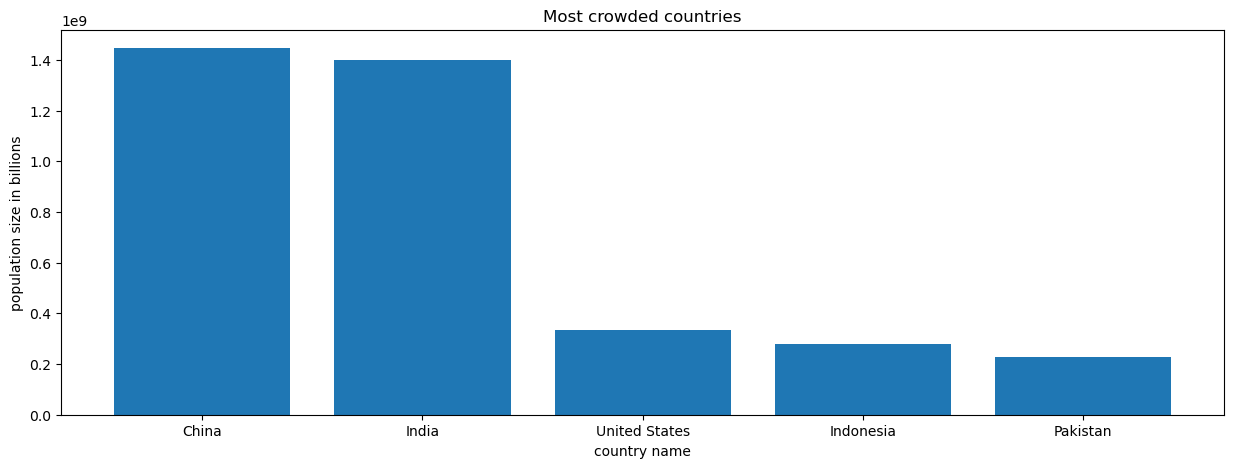

In [ ]:
x=df.iloc[-5:,0:2]['country name']
y=df.iloc[-5:,1:3]['2021 population']
plt.figure(figsize=(15, 5))
plt.bar(x,y)
plt.title('Least crowded countries')
plt.xlabel('country name')
plt.ylabel('population size')
x=df.iloc[:5,0:2]['country name']
y=df.iloc[:5,0:3]['2021 population']
plt.figure(figsize=(15, 5))
plt.bar(x,y)
plt.title('Most crowded countries')
plt.xlabel('country name')
plt.ylabel('population size in billions')



**for 2020 population**

Text(0, 0.5, 'population size in billions')

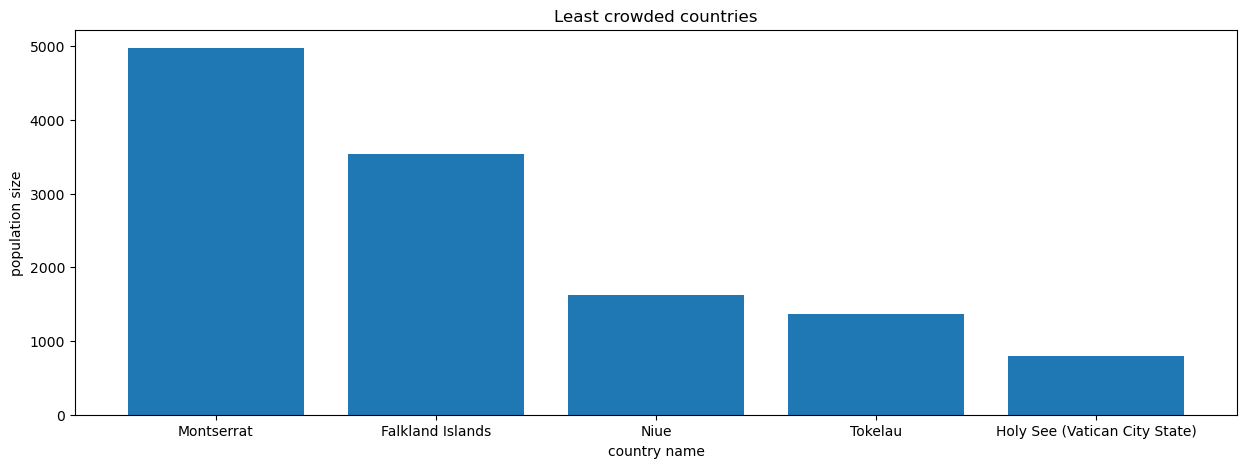

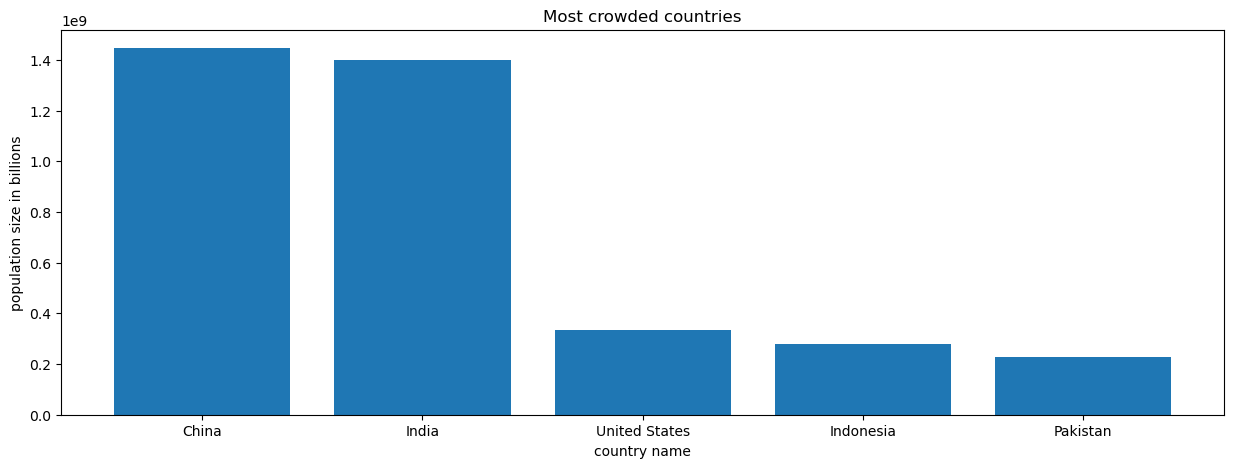

In [ ]:
x=df['country name'][-5:]
y=df['2021 population'][-5:]
plt.figure(figsize=(15, 5))
plt.bar(x,y)
plt.title('Least crowded countries')
plt.xlabel('country name')
plt.ylabel('population size')
x=df['country name'][:5]
y=df['2021 population'][:5]
plt.figure(figsize=(15, 5))
plt.bar(x,y)
plt.title('Most crowded countries')
plt.xlabel('country name')
plt.ylabel('population size in billions')


**Conclusion**

As shown above, the most and least crowded countries according to 2020 and 2021 population are the same which are:  
*the most crowded countries*
 * China
 * India
 * United States
 * Indonesia
 * Pakistan  
**the least crowded countries** 
 * Montserrat
 * Falklan Islands
 * Niue
 * Tokelau
 * Vatican City

# Density Column

The density column describes population per km squared. Where we use the population and the area of the country column to divide the total population of a country by it's area. For example, The first country in the data entry is "China" with population size of 1,446,364,682 and 9,706,961 km squared, substituting the previous numbers in the mentioned equation would yield 149. This means that each km square in contains 149 person.


In [ ]:
df["density 2020"]=df["2020 population"]/df["area"]
df["density 2021"]=df["2021 population"]/df["area"]

let's focus on the top 10 countries that have higher densities to figure out if they solve the problem or not 


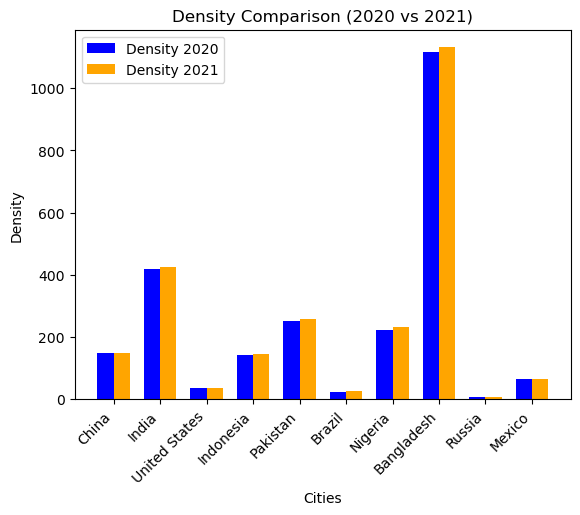

In [ ]:

df_top=df.head(10)
cities = df_top["country name"].tolist()
density_2020 =df_top["density 2020"].tolist()
density_2021 =df_top["density 2021"].tolist()

bar_width = 0.35
r1 = range(len(cities))
r2 = [x + bar_width for x in r1]

plt.bar(r1, density_2020, color='blue', width=bar_width, label='Density 2020')
plt.bar(r2, density_2021, color='orange', width=bar_width, label='Density 2021')

plt.xlabel('Cities')
plt.ylabel('Density')
plt.title('Density Comparison (2020 vs 2021)')
plt.xticks([r + bar_width/2 for r in range(len(cities))], cities)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

**Conclusion**

as shown in the previous figure, most of the countries didn't solve the problem as they density increased by 2021 eexcept "Russia" and "Mexico".

**Finding correlation between our features and population**

In [ ]:
df.corr().style.background_gradient(cmap='Blues')

,2020 population,2021 population,area,density sq km,growth rate,population ratio,rank,New growth rate,density 2020,density 2021
2020 population,1.000000,0.999980,0.454019,-0.028204,-0.013186,0.999990,-0.353815,-0.008905,-0.028252,-0.028189
2021 population,0.999980,1.000000,0.452918,-0.028355,-0.010802,0.999997,-0.355159,-0.006495,-0.028405,-0.028340
area,0.454019,0.452918,1.000000,-0.063616,-0.005190,0.453227,-0.377925,0.000610,-0.063704,-0.063612
density sq km,-0.028204,-0.028355,-0.063616,1.000000,-0.029101,-0.028287,0.136498,-0.035412,0.999991,0.999995
growth rate,-0.013186,-0.010802,-0.005190,-0.029101,1.000000,-0.011470,-0.258997,0.996511,-0.030210,-0.028623
population ratio,0.999990,0.999997,0.453227,-0.028287,-0.011470,1.000000,-0.354822,-0.007163,-0.028336,-0.028272
rank,-0.353815,-0.355159,-0.377925,0.136498,-0.258997,-0.354822,1.000000,-0.285795,0.136919,0.136227
New growth rate,-0.008905,-0.006495,0.000610,-0.035412,0.996511,-0.007163,-0.285795,1.000000,-0.036541,-0.034892
density 2020,-0.028252,-0.028405,-0.063704,0.999991,-0.030210,-0.028336,0.136919,-0.036541,1.000000,0.999974
density 2021,-0.028189,-0.028340,-0.063612,0.999995,-0.028623,-0.028272,0.136227,-0.034892,0.999974,1.000000


**Conclusion**

As known, any correlation coefficient has to be within the range (-1,1) where -1 stands for a strong negative relation and 1 stands for a strong positive one. so as shown above, we can determine which factors affect each other the most. 
as for 2021 population, it has the hight correlation coefficient with 2020 population and population ratio so these features affect each other the most.
and as for 2020 population, it also has the hight correlation coefficient with 2021 population and population ratio.

Is there a relation between the area of a country and its density?

**What is the correlation between area and density?**

In [ ]:
df['area'].corr(df['density sq km'])

-0.06361630958985275

**visual display for the correlation between area and density**

Text(0, 0.5, 'density of the country ')

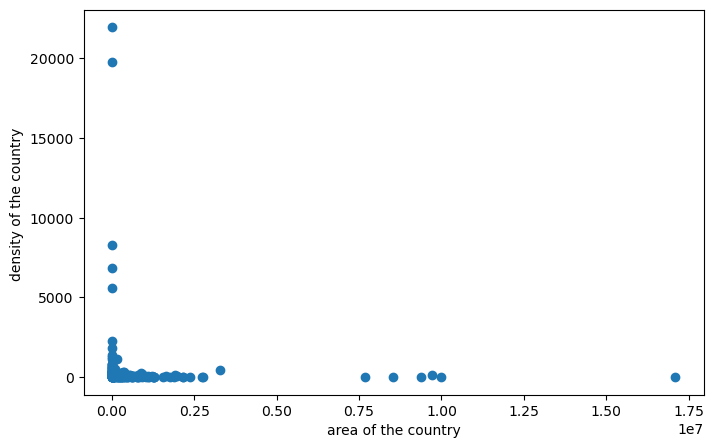

In [ ]:
#comparing between the area of a country and density for the 5 most and least crowded countries
plt.figure(figsize=(8,5))
x=df['area']
y=df['density sq km']
plt.scatter(x,y)
plt.xlabel('area of the country')
plt.ylabel('density of the country ')

Text(0.5, 0, 'Country name')

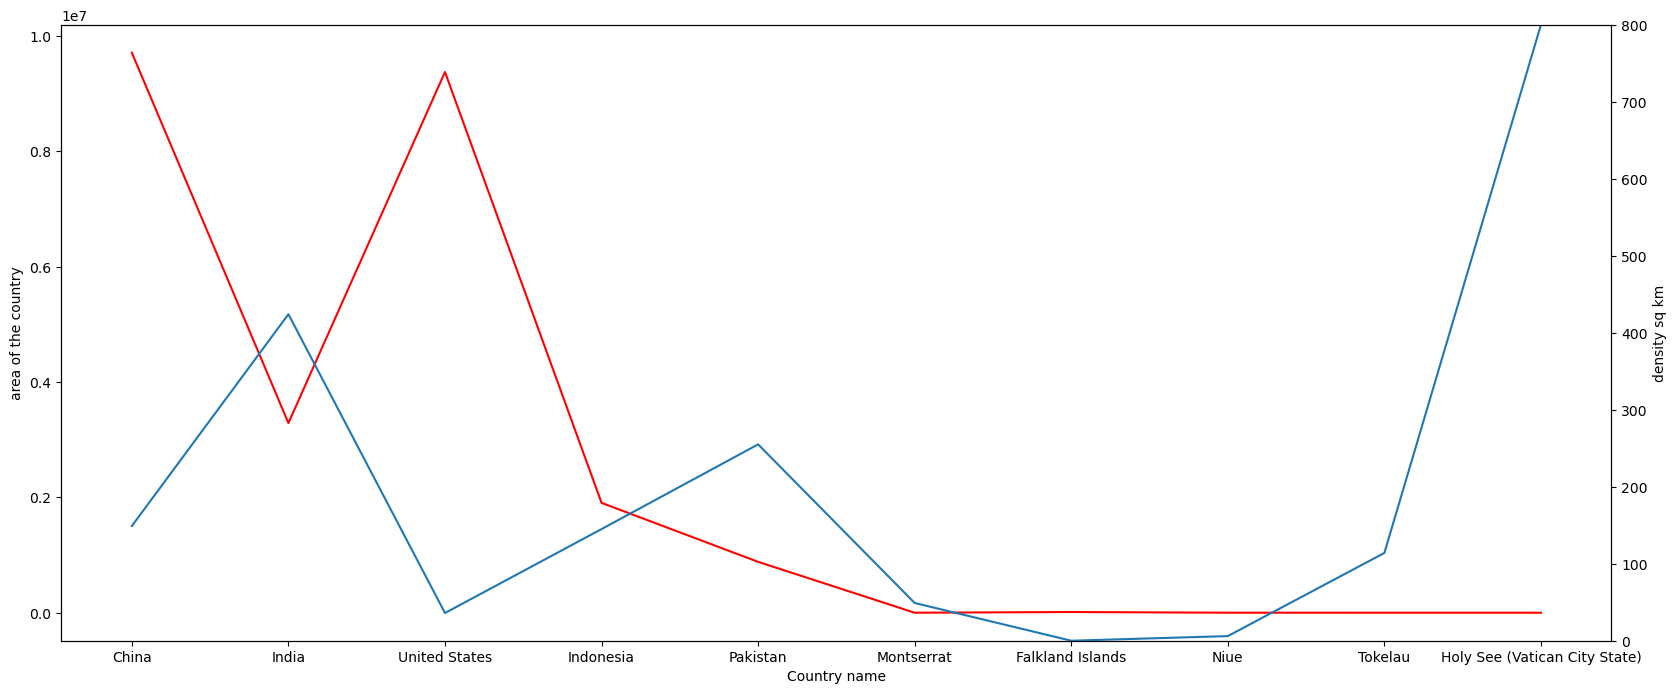

In [ ]:
#comparing between the area of a country and density for the 5 most and least crowded countries
x=df.iloc[[*range(5), *range(-5,0)]]['country name']
y=df.iloc[[*range(5), *range(-5,0)]]['area']
z=df.iloc[[*range(5), *range(-5,0)]]['density sq km']
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()  
ax2.set_ylim(0,800)
ax1.plot(x, y,color='red')
ax2.plot(x, z)
ax1.set_ylabel('area of the country')
ax2.set_ylabel('density sq km')
ax1.set_xlabel('Country name')

**conclusion**

As shown above, there is a relatively strong relation between the area of a country and its density, which is an inverse relation as shown in the graphs and as a correlation coefficient. so, that means that if the density of a country increases or is high, the area of this country is relatively small

#But is there a relationship between growth rate and how the country is developed ? 

In [ ]:
df.sort_values(by=['New growth rate'],ascending=False,inplace =True)

In [ ]:
df.head(5)

,country name,2020 population,2021 population,area,density sq km,growth rate,population ratio,rank,New growth rate,density 2020,density 2021
64,Syria,17500658,18555082,185180,99,4.43,0.23,66,6.03,94.506199,100.200248
54,Niger,24206644,25543304,1267000,20,3.82,0.32,56,5.52,19.105481,20.160461
150,Equatorial Guinea,1402985,1470699,28051,52,3.34,0.02,153,4.83,50.015507,52.429468
41,Angola,32866272,34410620,1246700,27,3.25,0.43,43,4.70,26.362615,27.601364
76,Burundi,11890784,12416982,27834,440,3.07,0.16,78,4.43,427.203564,446.108429


**The most 10 Countries have growth rate**

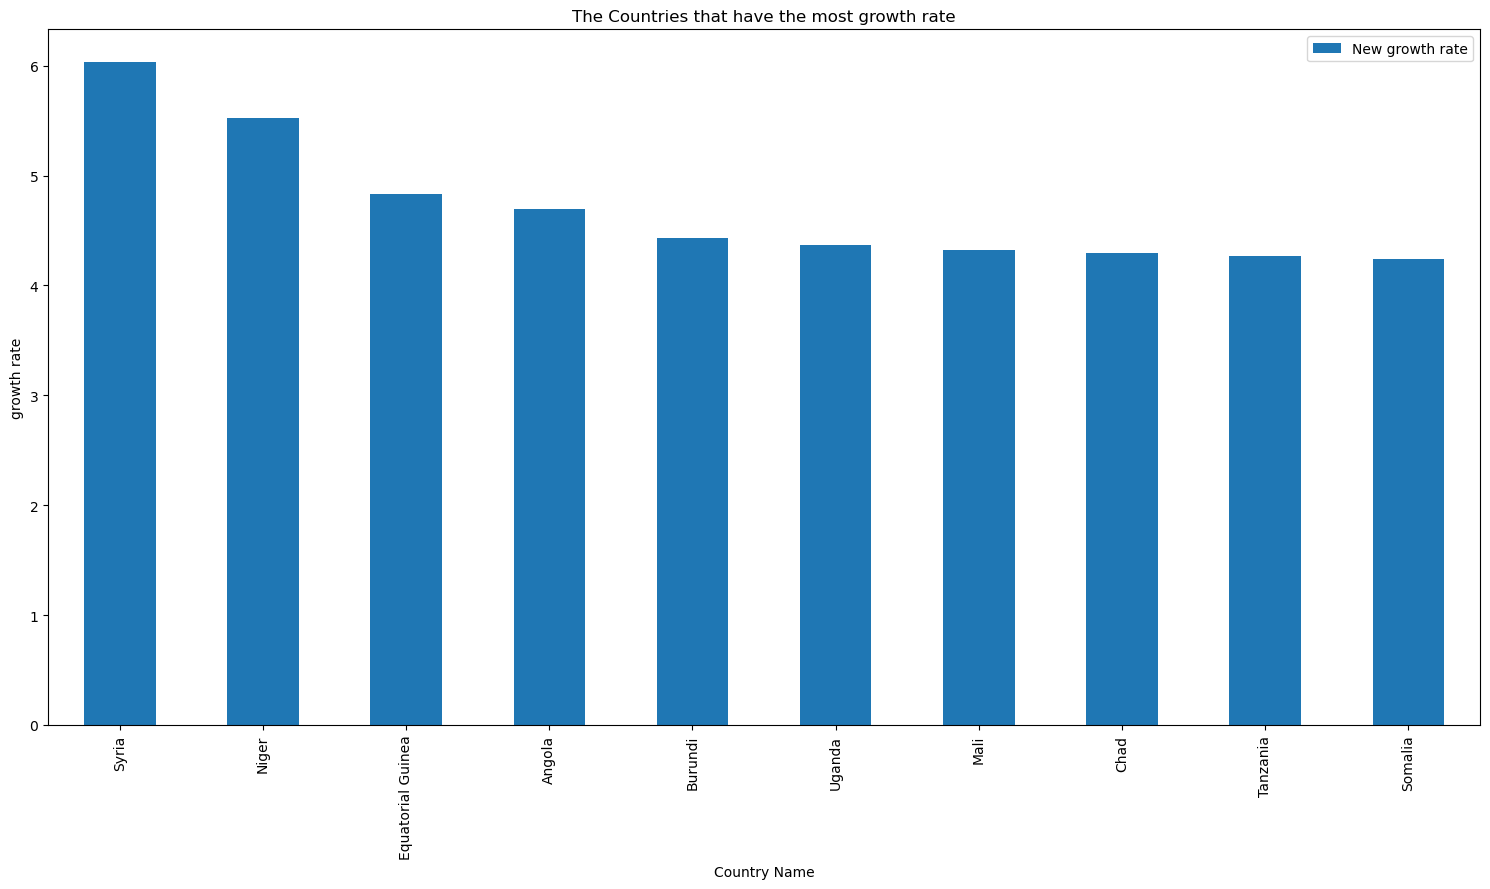

In [ ]:
df_max=df[["country name",'New growth rate']].head(10)
df_max.plot(x="country name", y='New growth rate', kind="bar",rot=90,figsize=(15,9),title="The Countries that have the most growth rate",xlabel='Country Name',ylabel="growth rate")
plt.tight_layout()
plt.show()

**The least 10 Countries have growth rate**

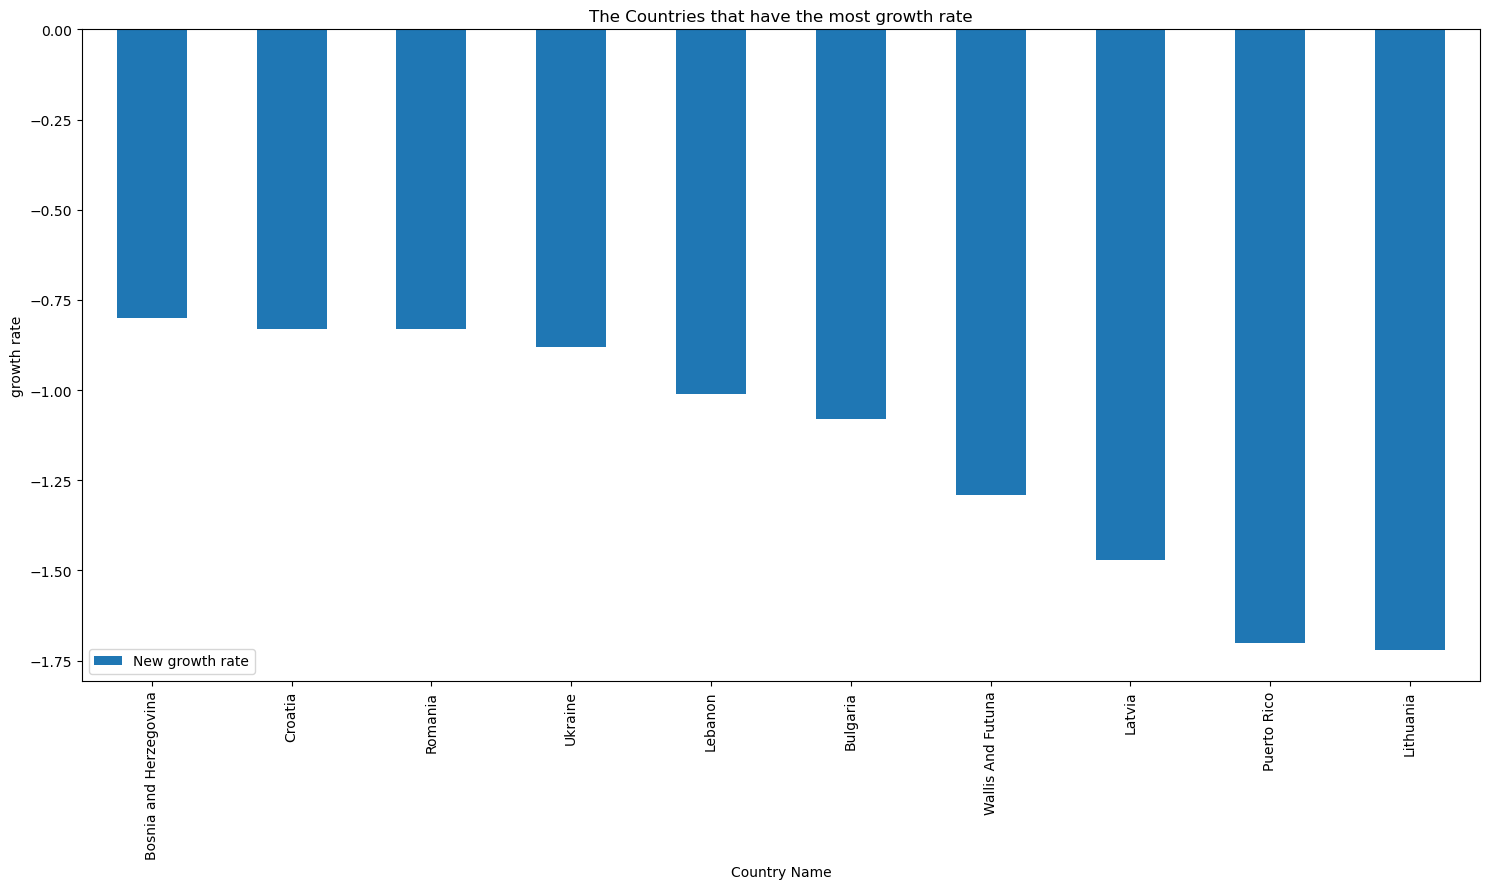

In [ ]:
df_min=df[["country name",'New growth rate']].tail(10)
df_min.plot(x="country name", y='New growth rate', kind="bar",rot=90,figsize=(15,9),title="The Countries that have the most growth rate",xlabel='Country Name',ylabel="growth rate")
plt.tight_layout()
plt.show()

**Conclusion**

most of the countries that have high growth rate are Developing countries.

In [ ]:
new_order = ["country name","2020 population","2021 population","area","density sq km","density 2020","density 2021","growth rate","population ratio","rank"]
df = df.reindex(new_order, axis=1)
df.head(10)

,country name,2020 population,2021 population,area,density sq km,density 2020,density 2021,growth rate,population ratio,rank
64,Syria,17500658,18555082,185180,99,94.506199,100.200248,4.43,0.23,66
54,Niger,24206644,25543304,1267000,20,19.105481,20.160461,3.82,0.32,56
150,Equatorial Guinea,1402985,1470699,28051,52,50.015507,52.429468,3.34,0.02,153
41,Angola,32866272,34410620,1246700,27,26.362615,27.601364,3.25,0.43,43
76,Burundi,11890784,12416982,27834,440,427.203564,446.108429,3.07,0.16,78
28,Uganda,45741007,47741125,241550,195,189.364550,197.644898,3.02,0.60,30
58,Mali,20250833,21124713,1240192,17,16.328789,17.033421,2.99,0.26,60
70,Chad,16425864,17132768,1284000,13,12.792729,13.343277,2.98,0.21,72
21,Tanzania,59734218,62283431,945087,65,63.204994,65.902325,2.95,0.78,23
71,Somalia,15893222,16566723,637657,26,24.924406,25.980618,2.93,0.21,73


**Note:**

By analysis, we found out that the growth rate of Syria is way too high to be true(4.43),so by research the real growth rate was detected and replaced in the data

    

In [ ]:
df[df['country name'] == 'Syria']['growth rate']

64    4.43
Name: growth rate, dtype: float64

In [ ]:
#Replacing the wrong data
df.at[64,'growth rate'] = -3.9

<span style="color: #02d9fa">

# Credits

---

## Content created by [ApplAi](https://www.linkedin.com/company/applaiasu/mycompany/)


**Directed By:**
- Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)

**Team leader:**
- [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett)

**Technical Team:**
- [yara ihab](https://www.linkedin.com/in/yara-ihabb/)
- [marina atef](https://www.linkedin.com/in/marina-atef-80a882263)
- [ahmed yasser](https://www.linkedin.com/in/ahmed-yasser-5533b5258)
- [mohamed samy](https://www.linkedin.com/in/mohamed-samy10/)

## Date of creation

- **30 April 2023**
---
</span>